In [1]:
def write_to_file(filename, N, K, Q, x, y, q, a, b, serv):
    with open(filename, 'w') as f:
        f.write(filename + "\n\n")
        f.write("VEHICLE\nNUMBER CAPACITY\n")
        f.write(str(K)+  " " + str(Q) + "\n\n")
        f.write("CUSTOMER\nCUST NO. XCOORD. YCOORD. DEMAND READY TIME DUE DATE SERVICE TIME\n\n")
        for i in range(N + 1):
            f.write(str(i)+  " " + str(x[i]) + " "+ str(y[i]) +" "+ str(q[i]) + " " + str(a[i])\
                    + " " + str(b[i])+ " " + str(serv[i]) + "\n")
    return  

In [2]:
from random import randint
from random import random
def generate(base_name, number_of_instances, N, K, Q, x, y, q, a, b, serv,option):
    for i in range(number_of_instances):
        
        up = 10
        low = 1
        if option == "SS":
            up = 10
            low = 5
        elif option == "LL":
            up = 100
            low = 1
        elif option == "LS":
            up = 100
            low = 50
        q_ = [0]
        index = [0]
        for j in range(1, N + 1):
            s = random()
            if s >= 0.2:
                q_.append(randint(low,up))
                index.append(j)
        k = min(K, 75)
        N_ = len(q_) - 1
        x_ = [x[k] for k in index]
        y_ = [y[k] for k in index]
        a_ = [a[k] for k in index]
        b_ = [b[k] for k in index]
        serv_ = [serv[k] for k in index]
        write_to_file(str(base_name) + "_" + str(i), N_, k, Q, x_, y_, q_, a_, b_, serv_)

In [3]:
def read_file(file_name, N):
    x, y, q, a, b, serv = [], [], [], [], [], []
    K, Q = 0, 0
    with open (file_name) as f:
        lines = f.readlines()
        K,Q = lines[4].split()
        K = int(K)
        Q = int(Q)
        option = lines[5].strip()[-2:]
        for i in range(9, 10 + N):
            _,x_i, y_i, q_i, a_i, b_i, serv_i  = str(lines[i]).split()
            x.append(int(x_i))
            y.append(int(y_i))
            q.append(int(q_i))
            a.append(int(a_i))
            b.append(int(b_i))
            serv.append(int(serv_i))
    return K, Q, x, y, q, a, b, serv, option

In [4]:
N = 200
K, Q, x, y, q, a, b, serv,option = read_file("solomon-benchmark/generated_instances/43", N)
print(option)
generate("Test/43", 250, N, K, Q, x, y, q, a, b, serv, option)

LL


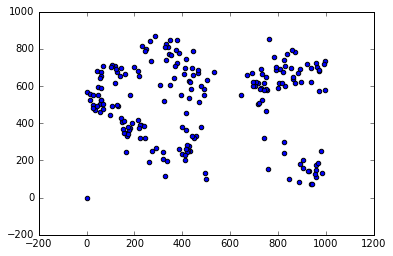

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
K, Q, x, y, q, a, b, serv, option = read_file("solomon-benchmark/generated_instances/43", 200)
plt.scatter(x,y)
plt.show()